In [1]:
import pandas as pd

df = pd.read_csv('/content/Customer.csv', index_col='ID', parse_dates=['Dt_Customer'])
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [2]:
d = df.describe()
table = df.reindex(d.columns, axis = 1).agg(['min','max','mean','median','std']).T

table["mode"] = df.mode(numeric_only=True).T

q1 = df.quantile(0.25, numeric_only=True)
q3 = df.quantile(0.75, numeric_only=True)
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR

table["outlier upper bound"] = upper_bound
table["outlier lower bound"] = lower_bound

table

,min,max,mean,median,std,mode,outlier upper bound,outlier lower bound
Year_Birth,1893.0,1996.0,1968.805804,1970.0,11.984069,1976.0,2004.0,1932.0
Income,1730.0,666666.0,52247.251354,51381.5,25173.076661,7500.0,118350.5,-14525.5
Kidhome,0.0,2.0,0.444196,0.0,0.538398,0.0,2.5,-1.5
Teenhome,0.0,2.0,0.506250,0.0,0.544538,0.0,2.5,-1.5
Recency,0.0,99.0,49.109375,49.0,28.962453,56.0,149.0,-51.0
MntWines,0.0,1493.0,303.935714,173.5,336.597393,2.0,1225.0,-697.0
MntFruits,0.0,199.0,26.302232,8.0,39.773434,0.0,81.0,-47.0
MntMeatProducts,0.0,1725.0,166.950000,67.0,225.715373,7.0,556.0,-308.0
MntFishProducts,0.0,259.0,37.525446,12.0,54.628979,0.0,120.5,-67.5
MntSweetProducts,0.0,263.0,27.062946,8.0,41.280498,0.0,81.0,-47.0


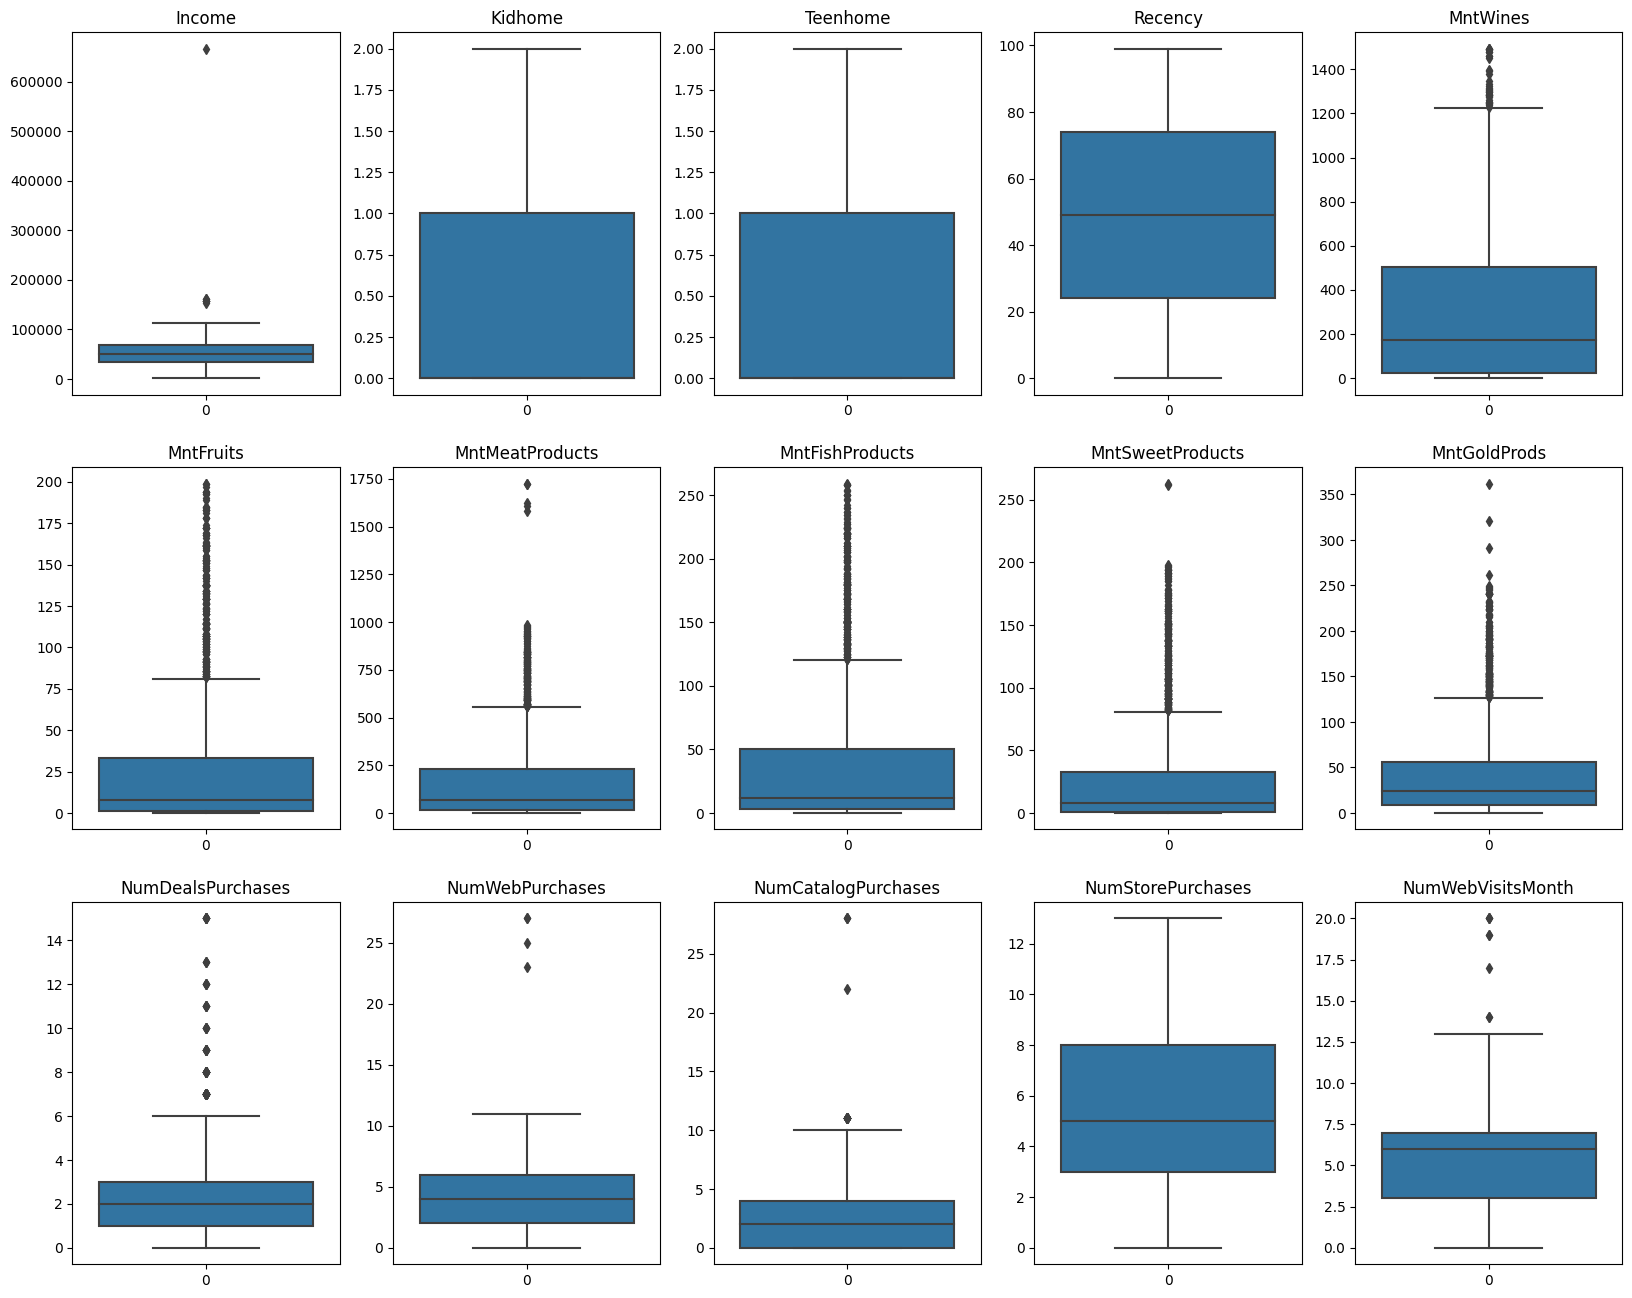

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(3, 5,  figsize=(20,16))
axs = axs.flatten()
for i, data in enumerate(numeric_columns):
    sns.boxplot( data=df[data], orient='v', ax=axs[i])
    axs[i].set_title(data)

In [39]:
print(sum(df.isna().sum(axis = 1) == 0) / df.shape[0])
print(sum(df[['Income', 'Kidhome', 'Teenhome', 'Recency']].isna().sum(axis = 1) == 0) / df.shape[0])
print ((df.isna() == 0).sum().sum() / df.size)

0.9892857142857143
0.9892857142857143
0.9996428571428572


2240

EDA 1

([<matplotlib.patches.Wedge at 0x7f6b0b6c7970>,
 [Text(-0.010799092464652335, 1.099946989450828, 'Graduation'),
  Text(-0.840441051704004, -0.7096892549635142, 'PhD'),
  Text(0.3574766803682644, -1.0402934311976049, 'Master'),
  Text(0.9970110351959686, -0.4647246450291434, '2n Cycle'),
  Text(1.09684684539309, -0.08322858734369598, 'Basic')],
 [Text(-0.00834475326814044, 0.8499590373029124, '50.3%'),
  Text(-0.6494317217712757, -0.5483962424718064, '21.7%'),
  Text(0.27623198028456797, -0.8038631059254219, '16.5%'),
  Text(0.7704176181059756, -0.3591054075225199, '9.1%'),
  Text(0.8475634714401149, -0.06431299931103779, '2.4%')])

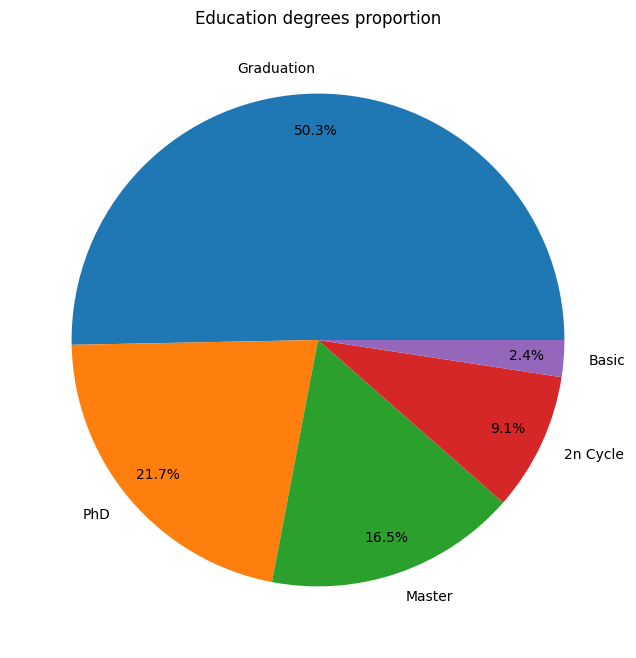

In [4]:
sizes = dict(df['Education'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Education degrees proportion")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85)


EDA 2

<ipython-input-5-7a938b6f4a81>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=temp.groupby(temp.year)['ID'].nunique(),


<Axes: xlabel='year', ylabel='ID'>

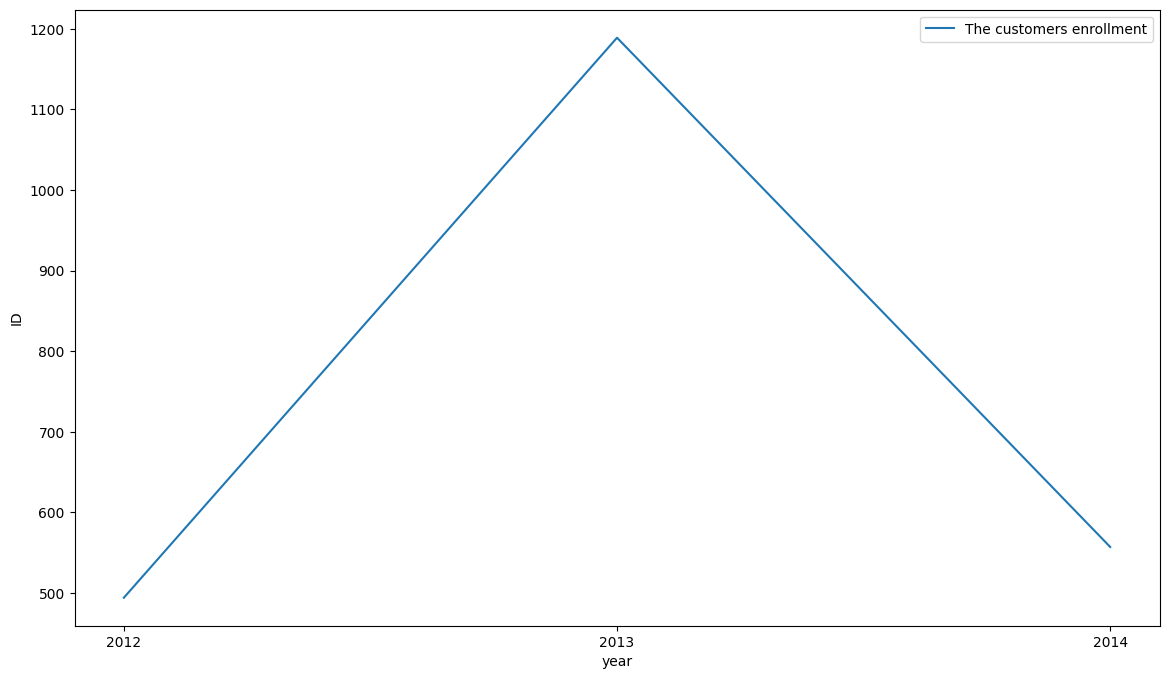

In [5]:
temp = pd.read_csv('/content/Customer.csv', parse_dates=['Dt_Customer'])
temp['year'] = temp['Dt_Customer'].dt.strftime('%Y')

fig = plt.figure(figsize=(14, 8))
sns.lineplot(data=temp.groupby(temp.year)['ID'].nunique(),
             label='The customers enrollment', palette="r",markers=True, dashes=False)

EDA 3

In [6]:
temp = df.copy()
temp['MntTotal'] = temp['MntWines']+temp['MntFruits']+temp['MntMeatProducts']+temp['MntFishProducts']+temp['MntSweetProducts']+temp['MntGoldProds']

temp = temp.assign(
        percentWines=lambda x: x['MntWines'] / x['MntTotal'] * 100,
        percentMeat=lambda x: x['MntMeatProducts'] / x['MntTotal'] * 100,
        percentFruits=lambda x: x['MntFruits'] / x['MntTotal'] * 100,
        percentFish=lambda x: x['MntFishProducts'] / x['MntTotal'] * 100,
        percentSweets=lambda x: x['MntSweetProducts'] / x['MntTotal'] * 100,
        percentGold=lambda x: x['MntGoldProds'] / x['MntTotal'] * 100,
)

IndexError: ignored

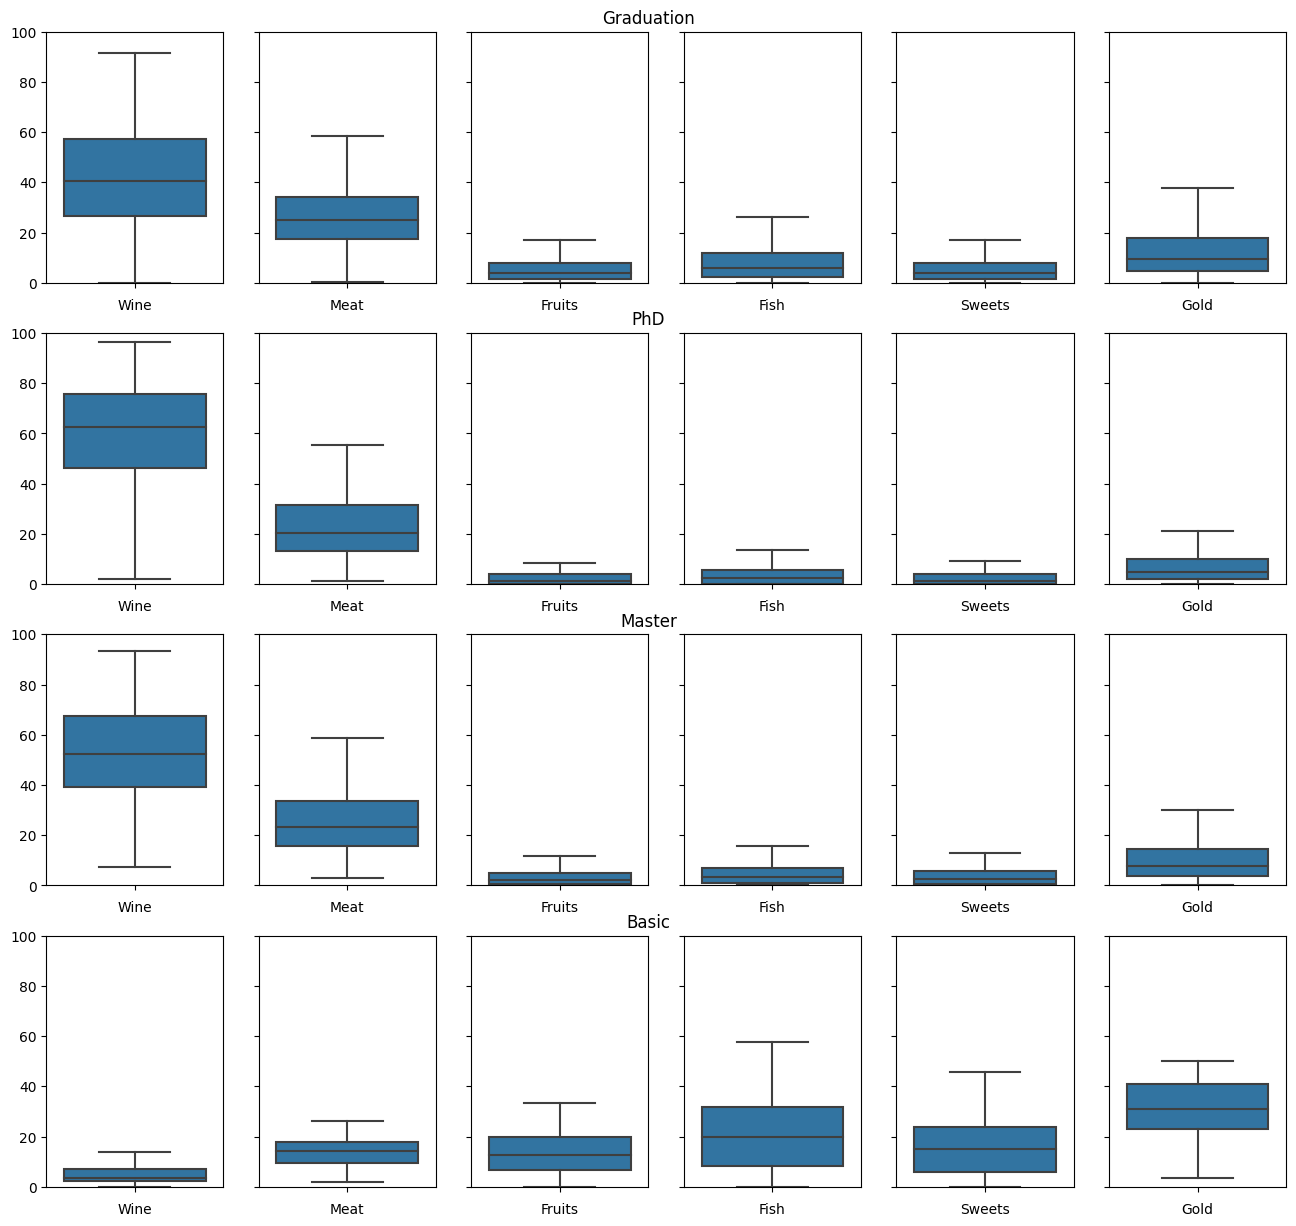

In [7]:
fig, axes = plt.subplots(4, 6, figsize=(16, 15), sharey=True)

for i, value in enumerate(temp['Education'].unique()):
    sns.boxplot(data=temp.query(f'Education == "{value}"'), y='percentWines', showfliers=False, ax=axes[i, 0])
    axes[i, 0].set_ylim(0, 100)
    axes[i, 0].set_xlabel('Wine')
    axes[i, 0].set_ylabel('')
    
    sns.boxplot(data=temp.query(f'Education == "{value}"'), y='percentMeat', showfliers=False, ax=axes[i, 1])
    axes[i, 1].set_xlabel('Meat')
    axes[i, 1].set_ylabel('')
    
    sns.boxplot(data=temp.query(f'Education == "{value}"'), y='percentFruits', showfliers=False, ax=axes[i, 2])
    axes[i, 2].set_xlabel('Fruits')
    axes[i, 2].set_ylabel('')
    axes[i, 2].set_title(f'{value}', x=1)
    
    sns.boxplot(data=temp.query(f'Education == "{value}"'), y='percentFish', showfliers=False, ax=axes[i, 3])
    axes[i, 3].set_xlabel('Fish')
    axes[i, 3].set_ylabel('')
    
    sns.boxplot(data=temp.query(f'Education == "{value}"'), y='percentSweets', showfliers=False, ax=axes[i, 4])
    axes[i, 4].set_xlabel('Sweets')
    axes[i, 4].set_ylabel('')
    
    sns.boxplot(data=temp.query(f'Education == "{value}"'), y='percentGold', showfliers=False, ax=axes[i, 5])
    axes[i, 5].set_xlabel('Gold')
    axes[i, 5].set_ylabel('')
    
plt.tight_layout()

EDA 4

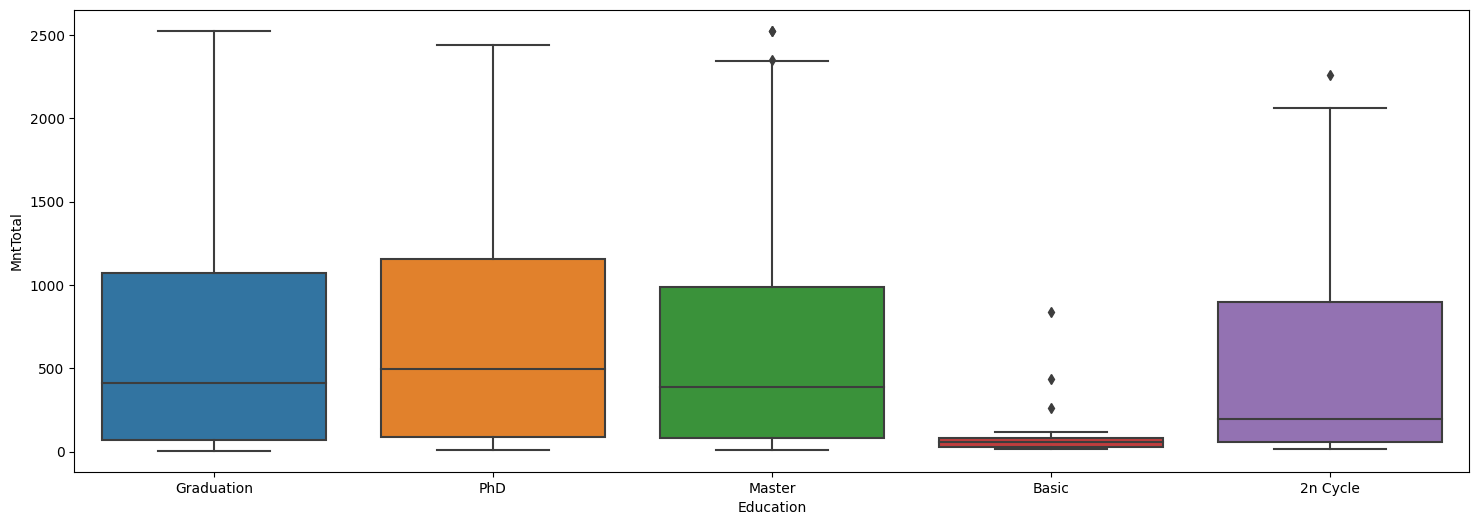

In [8]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=temp, x='Education', y='MntTotal')

EDA 5

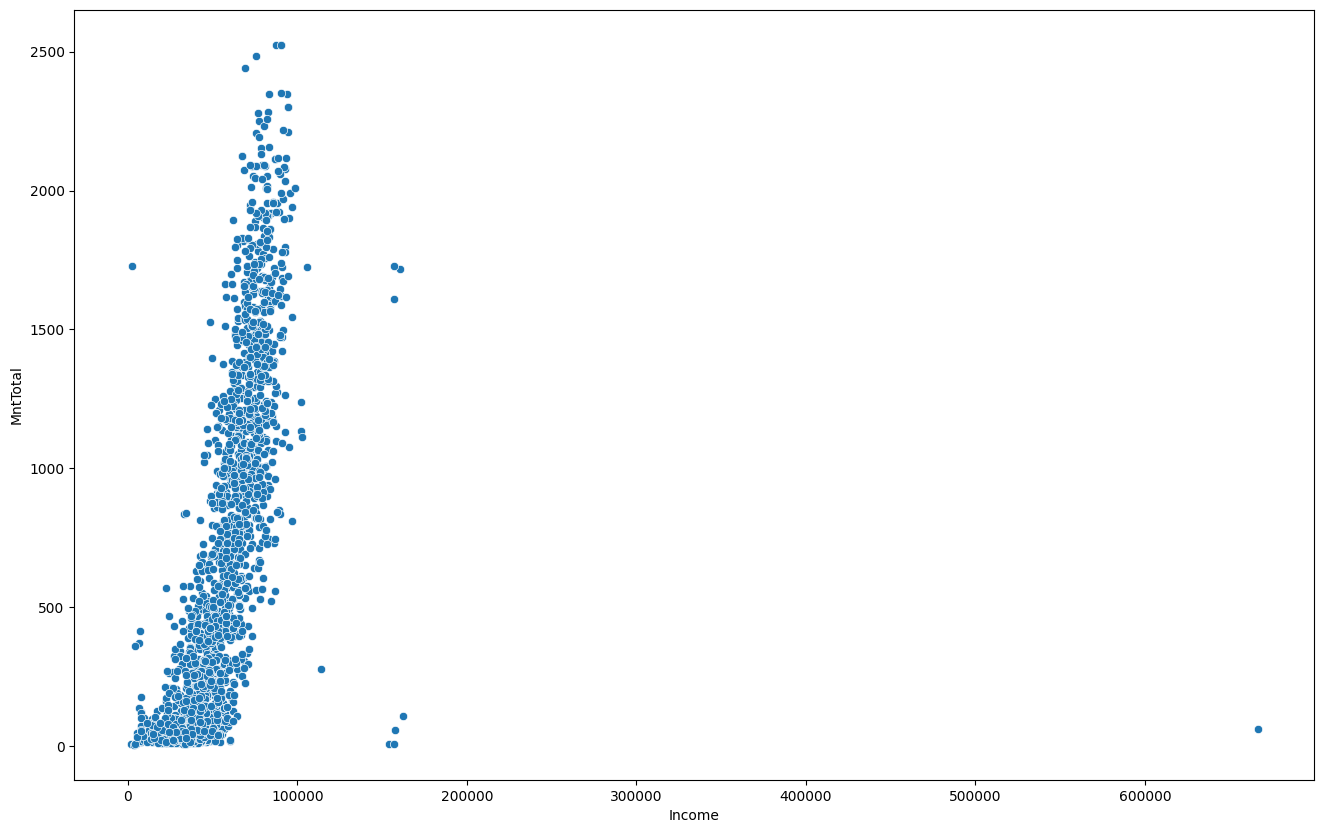

In [9]:
plt.figure(figsize = (16, 10))
a = sns.scatterplot(data = temp, x = "Income", y = "MntTotal")

In [10]:
temp[["Income", "MntTotal"]].corr()

,Income,MntTotal
Income,1.000000,0.667576
MntTotal,0.667576,1.000000


EDA 6

In [11]:
temp['at'] = temp.filter(regex='Accepted|Response').sum(axis=1)

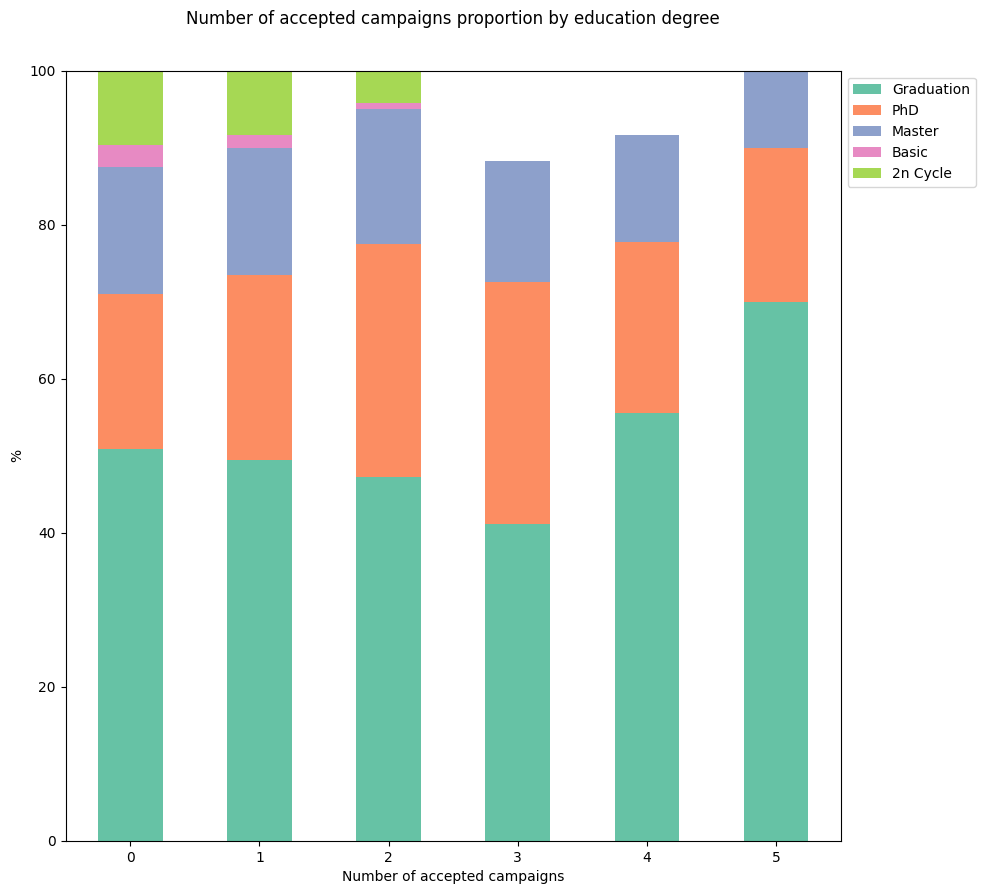

In [12]:
plt.figure(figsize=(10, 10))

PALETTE = sns.color_palette("Set2")

accepted_data = pd.Series({i: 0 for i in range(6)})
tmp_data = accepted_data
for i, value in enumerate(temp['Education'].unique()):
    tmp_data += accepted_data
    accepted_data = (temp.query(f'Education == "{value}"')['at'].value_counts()
                                                                           .divide(temp['at'].value_counts())
                                                                           .multiply(100))
    ax = accepted_data.plot(kind='bar', bottom=tmp_data, color=PALETTE[i], label=f'{value}')

del tmp_data

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title('Number of accepted campaigns proportion by education degree', y=1.05)
plt.xlabel('Number of accepted campaigns')
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1,1))

<Axes: xlabel='Age', ylabel='at'>

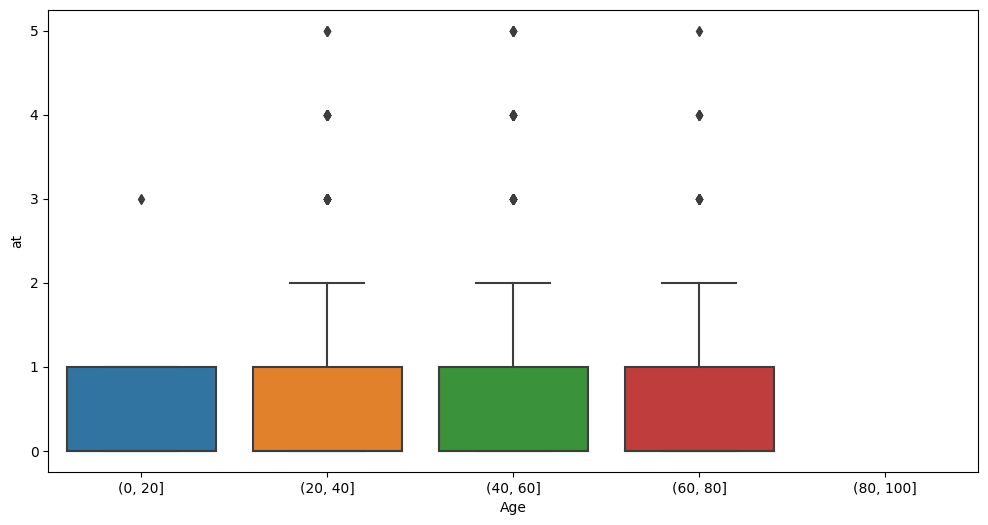

In [13]:
temp['Age'] = 2015 - temp["Year_Birth"]
aged = pd.cut(temp['Age'], bins = [0, 20, 40, 60, 80, 100])

plt.figure(figsize=(12,6))
sns.boxplot(x = aged, y = temp['at'])

<Axes: xlabel='Education', ylabel='Income'>

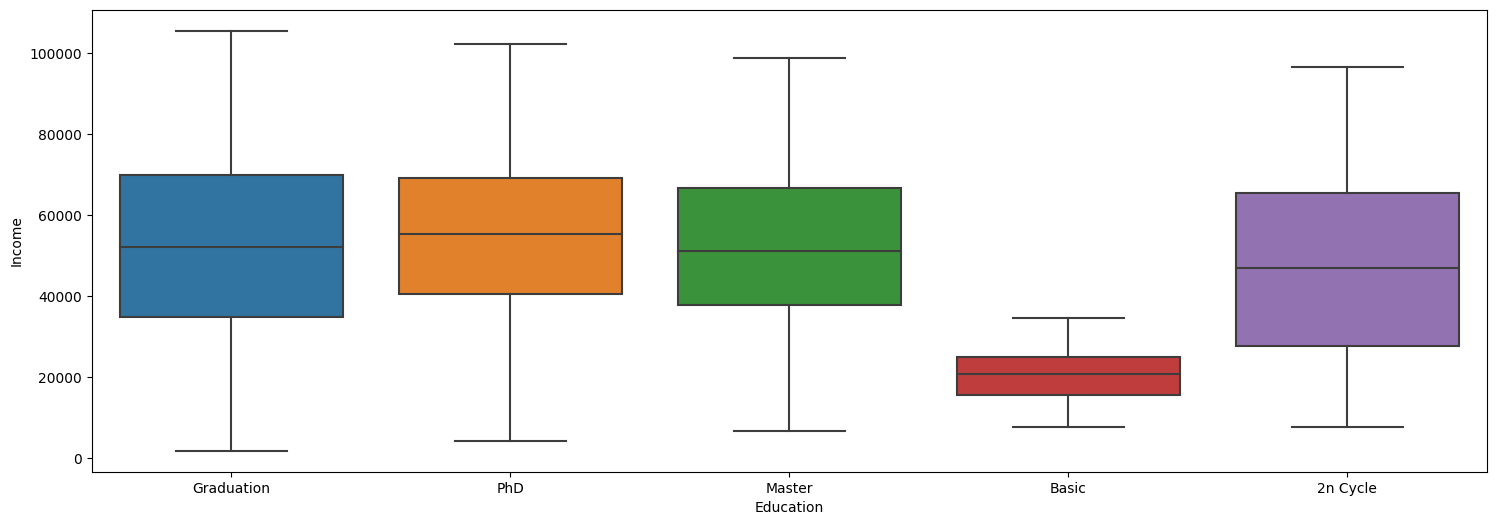

In [14]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=df.query('Income < 500000'), x='Education', y='Income', showfliers=False,)

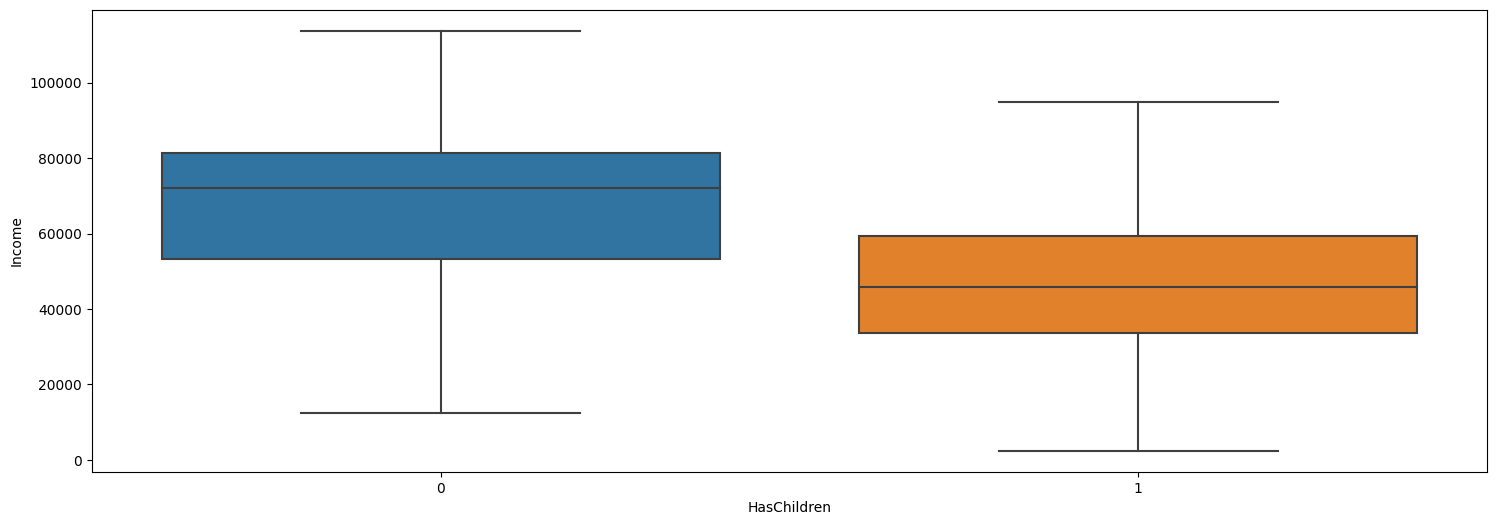

In [15]:
df['NumChildren'] = df['Kidhome'] + df['Teenhome']
df['HasChildren'] = (df['NumChildren'] >= 1).astype('int64')

plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=df.query('Income < 500000'), x='HasChildren', y='Income', showfliers=False)

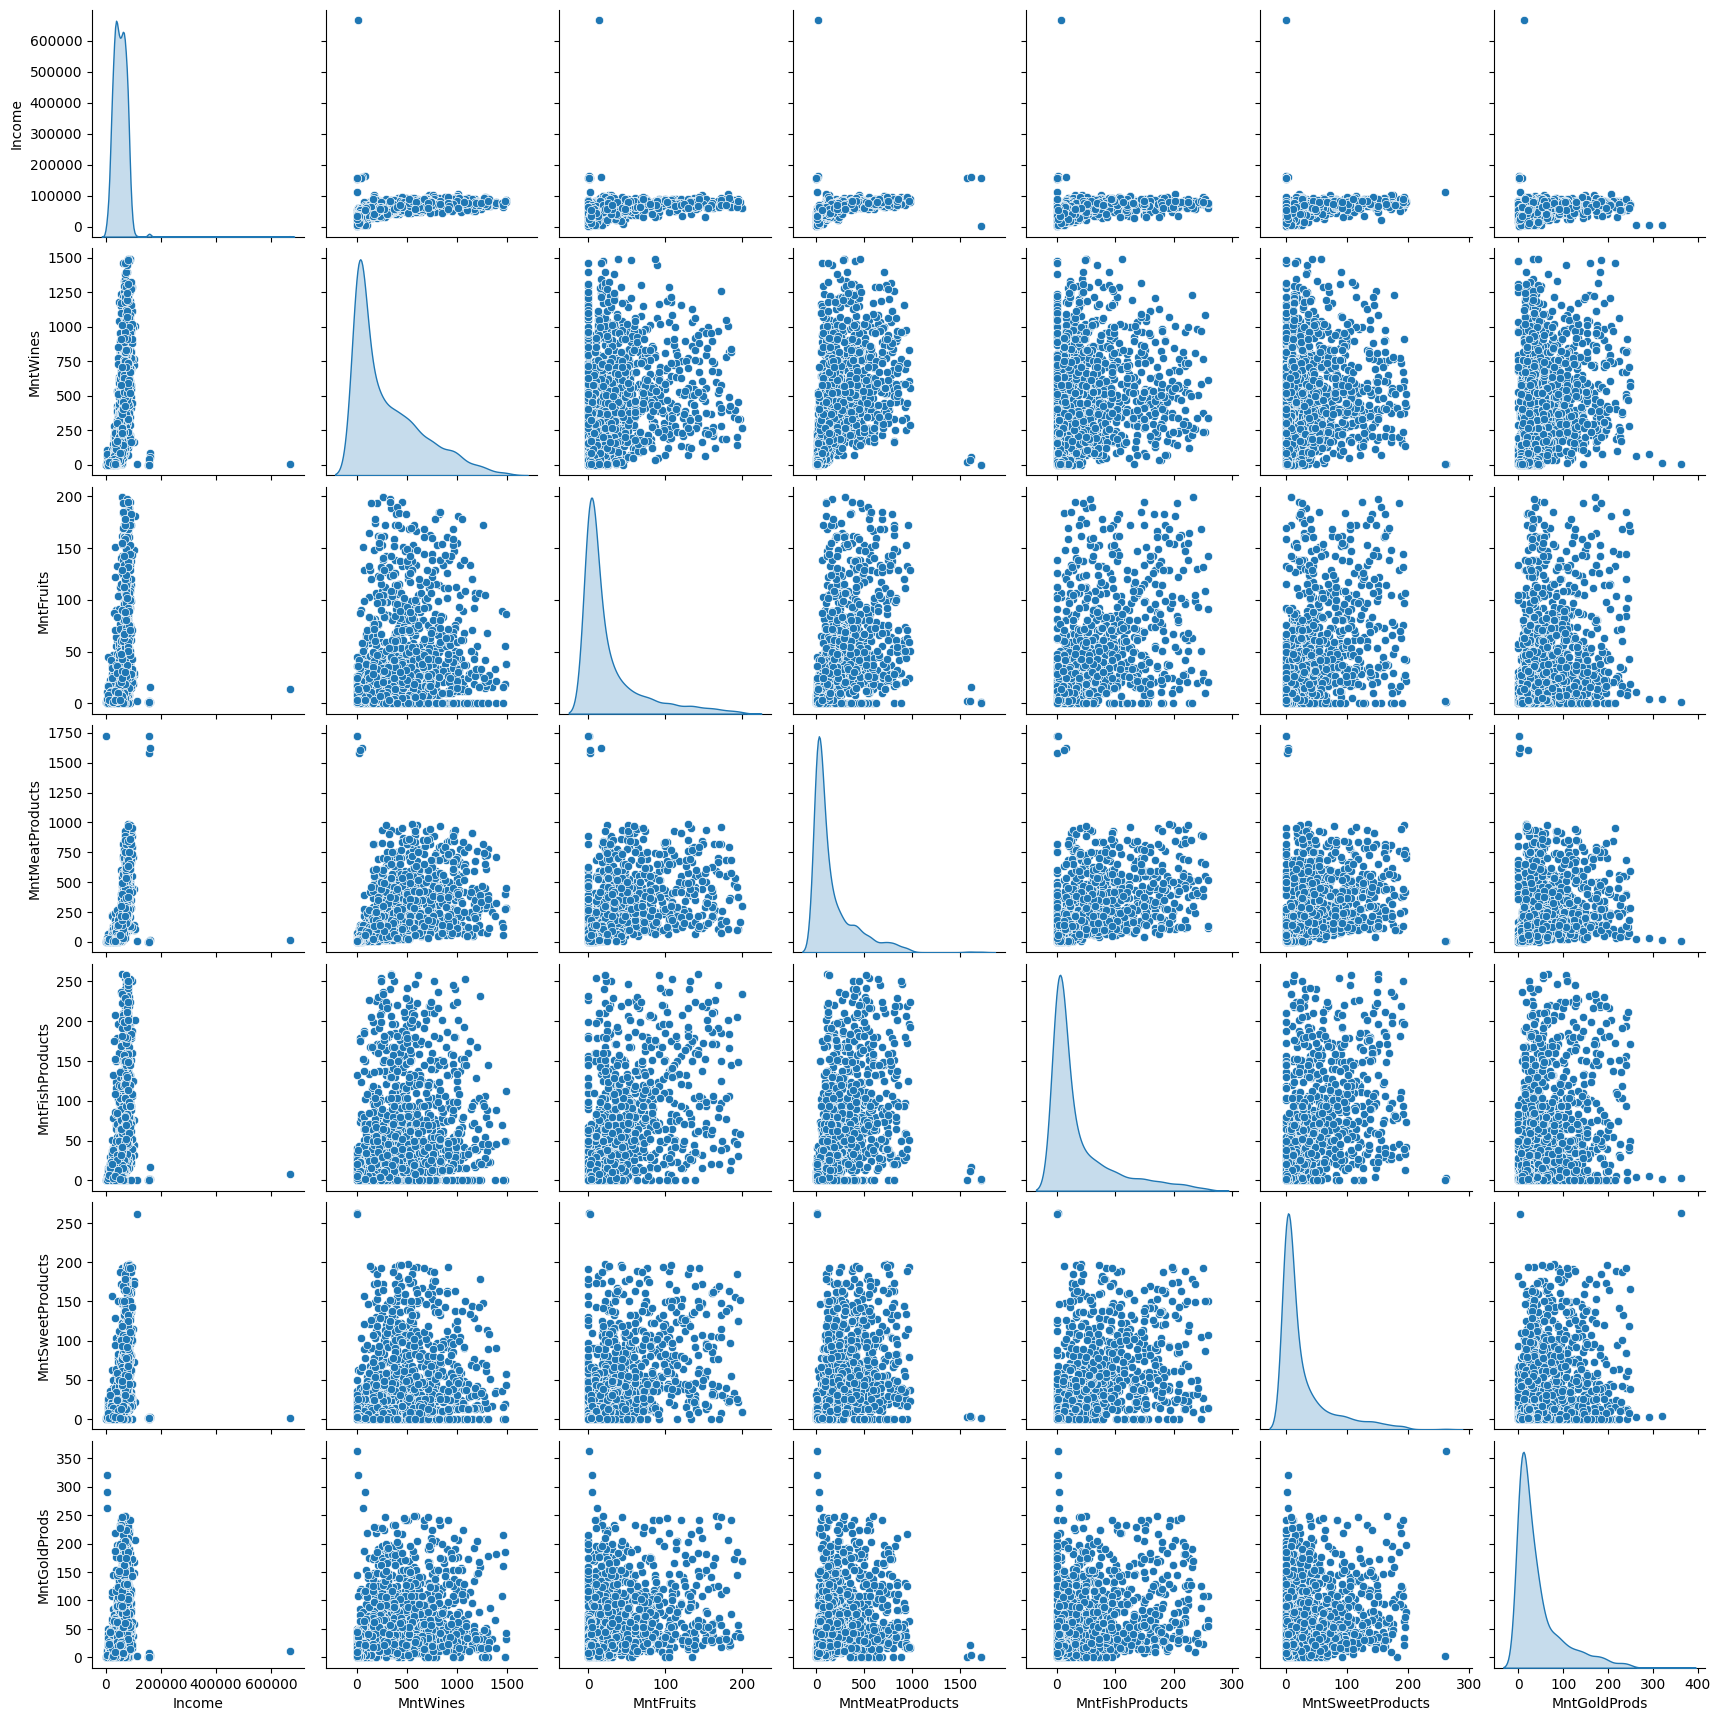

In [16]:
sns.pairplot(df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']], diag_kind="kde")

In [17]:
df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].corr()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Income,1.000000,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916
MntWines,0.578650,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516
MntFruits,0.430842,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995
MntMeatProducts,0.584633,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609
MntFishProducts,0.438871,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875
MntSweetProducts,0.440744,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724
MntGoldProds,0.325916,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000
